# **Chapter 03 신경망**

신경망은 **입력층**에서부터 시작하여 중간의 **은닉층**을 거쳐 **출력층**에 도달한다.
퍼셉트론은 다음과 같은 네트워크 구조를 보여주었다.
$y = \begin{cases} 0, & (w_1x_1 + w_2x_2 \leq \theta) \\ 1, & (w_1x_1 + w_2x_2 > \theta) \end{cases}$
특정 조건을 만족할 경우, 즉 특정 조건에서의 분기 동작을 만족하는 경우를 하나의 함수로 정의하면  $y = h(b+w_1x_1+w_2x_2)$ <br>
$h(x) = \begin{cases} 0, & (x \leq 0) \\ 1, & (x > 0) \end{cases}$ 로 표현된다

여기서 입력 신호의 총합을 출력 신호로 변화하는 함수를 추가하는데 이를 활성화 함수(activation funciton)이라고 한다. 따라서 위의 신경망의 식은 다음 두 단계로 나눠진다<br>
$a = b + w_1x_1 + w_2x_2$<br>
$y = h(a)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **3.1 활성화함수**

In [2]:
# 활성화함수

def step_function(x) :
    "계단 함수 : 입력이 0을 넘으면 1을 출력하고, 그렇지 않으면 0을 출력한다"
    if x > 0 :
        return 1
    else :
        return 0

def step_function_np(x) :
    "계단 함수 : 입력이 0을 넘으면 1을 출력하고, 그렇지 않으면 0을 출력한다"
    y = x > 0
    return y.astype(int) # boolean 자료형을 int로 변환하면서 0 또는 1을 출력함

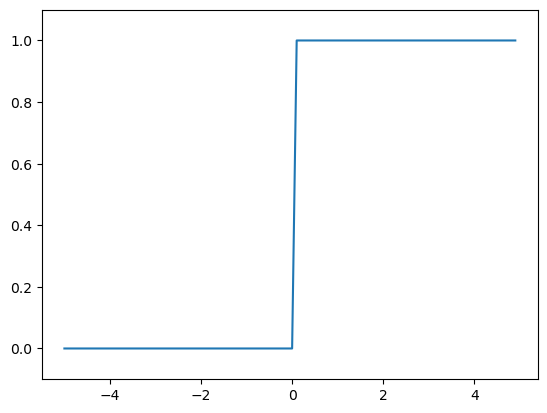

In [3]:
def step_function(x) :
    "계단 함수 : 입력이 0을 넘으면 1을 출력하고, 그렇지 않으면 0을 출력한다"
    y = x > 0
    return y.astype(int) # boolean 자료형을 int로 변환하면서 0 또는 1을 출력함

x = np.arange(-5.0, 5.0, 0.1) # -5.0에서 5.0 전까지 0.1 간격의 넘파이 배열 생성
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

In [4]:
# 시그모이드 함수

def sigmoid(x) :
    "시그모이드 함수 : S자 모양의 로지스틱 곡선"
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

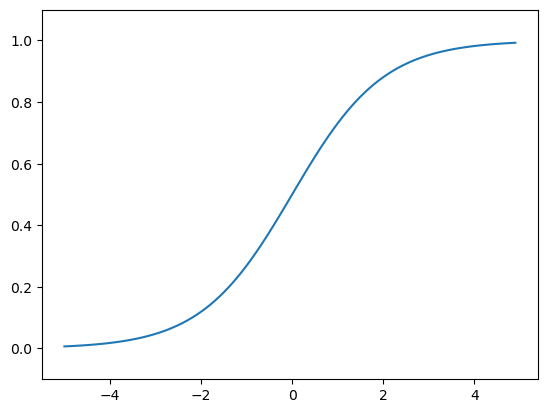

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [6]:
# relu 함수

def relu(x) :
    "ReLU 함수 : 입력이 0을 넘으면 그 입력을 그대로 출력하고, 그렇지 않으면 0을 출력한다"
    return np.maximum(0, x)

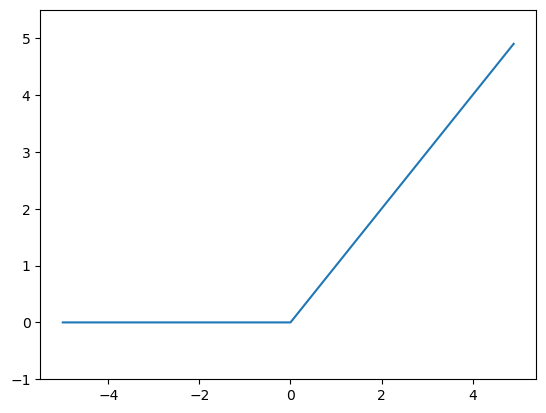

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

### **3.2 행렬 곱을 이용한 신경망의 연산**

<img src="https://github.com/ggapsang/DL_From_Bottom/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80%ED%8C%8C%EC%9D%BC/03_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98%20%EA%B5%AC%EC%A1%B0.jpg?raw=true" alt="신경망에서의 행렬 곱" width="500">

In [8]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W, W.shape)

X = np.array([1, 2])
print(X, X.shape)

Y = np.dot(X, W)
print(Y, Y.shape)

[[1 3 5]
 [2 4 6]] (2, 3)
[1 2] (2,)
[ 5 11 17] (3,)


보다 복잡한 2개의 은닉층을 가진 신경망의 예시

<img src="https://github.com/ggapsang/DL_From_Bottom/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80%ED%8C%8C%EC%9D%BC/03_%EC%8B%A0%EA%B2%BD%EB%A7%9D(%EB%8D%94%20%EB%B3%B5%EC%9E%A1%ED%95%9C%20%EA%B5%AC%EC%A1%B0).jpg?raw=true" alt="신경망에서의 행렬 곱" width="500">

In [9]:
def init_network() :
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x) :
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = a3
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### **3.3 출력층 설계하기**

#### **3.3.1 소프트맥스(softmax) 함수**
$y_k = \frac{exp(a_k)}{\sum{{^n}_{i=1}exp(a_i)}}$

- 분자는 입력 신호 $a_k$의 지수 함수
- 분모는 모든 입력 신호의 지수 함수의 합

**softmax 함수의 구현**

In [10]:
a = np.array([0.3, 2.9, 4.0])
a

array([0.3, 2.9, 4. ])

In [11]:
exp_a = np.exp(a)
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [12]:
sum_exp_a = np.sum(exp_a)
sum_exp_a

74.1221542101633

In [13]:
y = exp_a / sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [14]:
# 소프트맥스 함수
def softmax(a) :
    "소프트맥스 함수 : 입력 신호의 지수 함수를 출력 신호로 정규화한다. a는 배열"
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### **3.3.2 소프트맥스 함수 구현시 주의점 - 오버플로우**

- 소프트맥스 함수는 지수함수를 사용하고 있는데, 인자값이 조금만 커져도 값이 무한대에 가까워지고, 큰 값끼리 나눗샘을 하면 결과 수치가 '불안정'해진다
- 소프트맥스 함수 구현의 개선<br>

$y = \frac{exp(a_k)}{\Sigma^n_{i=1}exp(a_i)} = \frac{Cexp(a_k)}{C\Sigma^n_{i=1}exp(a_i)}$ <br>

$= \frac{exp(a_k + logC)}{\Sigma^n_{i=1}exp(a_i + logC)}$ <br>

$= \frac{exp(a_k + logC')}{\Sigma^n_{i=1}exp(a_i + logC')}$ <br>

오버플로우를 막을 목적으로 $C'$에 입력 신호 중 최대값을 입력한다

**예시**

In [15]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28684\832863605.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28684\832863605.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [16]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [17]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [18]:
# 다시 정의한 소프트맥스 함수
def softmax(a) :
    "소프트맥스 함수 : 입력 신호의 지수 함수를 출력 신호로 정규화한다. a는 배열. 오버플로우를 방지하기 위해 최대값을 빼준다"
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

**소프트맥수 함수의 특징 : 출력값들의 합이 1**

In [19]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

출력층 함수의 합이 1이 되기 때문에, 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다

소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다 ($y = exp(x)$는 단조증가 함수이다)

분류 문제에서는 택 1을 하기 때문에, 소프트맥스 함수를 출력층에서 굳이 사용하지 않아도 된다

### **3.4 MINST 숫자 손글씨 인식**

#### **3.4.1 MNIST 데이터셋**

In [20]:
import pickle
from torchvision import datasets, transforms

# MNIST 데이터셋 다운로드
transform = transforms.ToTensor()  # 데이터를 텐서로 변환
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 피클로 저장
with open('mnist_train.pkl', 'wb') as f:
    pickle.dump(train_dataset, f)

with open('mnist_test.pkl', 'wb') as f:
    pickle.dump(test_dataset, f)

print("MNIST 데이터셋이 피클 파일로 저장되었습니다.")


c:\Users\ASUS\anaconda3\envs\learnpytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [01:03<00:00, 156175.22it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 53528.62it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:08<00:00, 191297.65it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1507997.21it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

MNIST 데이터셋이 피클 파일로 저장되었습니다.


In [25]:
import numpy as np
from PIL import Image

# 이미지를 출력하는 함수 정의
def img_show(img):
    # 이미지 데이터를 0~255 범위로 변환
    img = (img * 255).astype(np.uint8)
    pil_img = Image.fromarray(img)
    pil_img.show()

# train_dataset에서 첫 번째 데이터 가져오기 (MNIST 예시)
img, label = train_dataset[0]  # 데이터셋이 (이미지, 라벨)로 구성된 경우
print("Label:", label)  # 라벨 출력

# 이미지를 확인하고 변환
print("Original shape:", img.shape)
if isinstance(img, np.ndarray):
    img = img.reshape(28, 28)  # numpy 배열인 경우
else:
    img = img.numpy().reshape(28, 28)  # PyTorch Tensor인 경우 numpy로 변환 후 reshape

print("Reshaped shape:", img.shape)
img_show(img)  # 이미지 출력


Label: 5
Original shape: torch.Size([1, 28, 28])
Reshaped shape: (28, 28)


In [26]:
def get_data():
    with open('mnist_train.pkl', 'rb') as f:
        train_dataset = pickle.load(f)
    with open('mnist_test.pkl', 'rb') as f:
        test_dataset = pickle.load(f)
    return train_dataset, test_dataset

def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [42]:
import numpy as np
from keras.datasets import mnist

# 1. 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0  # (60000, 784)
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0  # (10000, 784)

# 원-핫 인코딩
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

y_train = one_hot_encode(y_train, 10)
y_test = one_hot_encode(y_test, 10)

# 2. 활성화 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # 수치 안정성을 위해 최대값을 뺌
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# 3. 가중치 초기화
input_size = 784
hidden_size1 = 128
hidden_size2 = 64
output_size = 10

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
b1 = np.zeros(hidden_size1)
W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
b2 = np.zeros(hidden_size2)
W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
b3 = np.zeros(output_size)

# 4. 예측 함수
def predict(x):
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) + b3
    return softmax(z3)

# 5. 학습 루프
epochs = 10
learning_rate = 0.01
batch_size = 128

for epoch in range(epochs):
    # 미니배치 학습
    for i in range(0, x_train.shape[0], batch_size):
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        
        # 순전파
        z1 = np.dot(x_batch, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2, W3) + b3
        y_pred = softmax(z3)
        
        # 역전파
        error = y_pred - y_batch
        dW3 = np.dot(a2.T, error)
        db3 = np.sum(error, axis=0)
        
        delta2 = np.dot(error, W3.T) * sigmoid_derivative(a2)
        dW2 = np.dot(a1.T, delta2)
        db2 = np.sum(delta2, axis=0)
        
        delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(a1)
        dW1 = np.dot(x_batch.T, delta1)
        db1 = np.sum(delta1, axis=0)
        
        # 가중치 업데이트
        W3 -= learning_rate * dW3 / batch_size
        b3 -= learning_rate * db3 / batch_size
        W2 -= learning_rate * dW2 / batch_size
        b2 -= learning_rate * db2 / batch_size
        W1 -= learning_rate * dW1 / batch_size
        b1 -= learning_rate * db1 / batch_size

    # 진행 상황 출력
    predictions = np.argmax(predict(x_train), axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = np.mean(predictions == labels)
    print(f"Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy:.4f}")

# 6. 테스트 정확도
test_predictions = np.argmax(predict(x_test), axis=1)
test_labels = np.argmax(y_test, axis=1)
test_accuracy = np.mean(test_predictions == test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/10, Accuracy: 0.3515
Epoch 2/10, Accuracy: 0.5513
Epoch 3/10, Accuracy: 0.6190
Epoch 4/10, Accuracy: 0.6479
Epoch 5/10, Accuracy: 0.6690
Epoch 6/10, Accuracy: 0.6946
Epoch 7/10, Accuracy: 0.7247
Epoch 8/10, Accuracy: 0.7534
Epoch 9/10, Accuracy: 0.7772
Epoch 10/10, Accuracy: 0.7944
Test Accuracy: 0.8034
